In [ ]:
import numpy as np
from scipy.optimize import least_squares
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('data.csv')

In [37]:
df['date'] = pd.to_datetime(df['date'], format="%d-%m-%Y")

In [38]:
df = df.dropna()

In [39]:
df

,date,0.25,0.5,0.75,1,2,3,5,7,10,15,20,30
0,2020-11-02,4.35,4.36,4.38,4.42,4.69,5.02,5.64,6.10,6.52,6.85,7.01,7.18
1,2020-11-03,4.38,4.38,4.40,4.43,4.69,5.01,5.61,6.06,6.50,6.86,7.03,7.20
2,2020-11-05,4.37,4.36,4.37,4.39,4.58,4.84,5.37,5.79,6.21,6.55,6.72,6.90
3,2020-11-06,4.26,4.26,4.29,4.32,4.54,4.81,5.33,5.75,6.16,6.51,6.68,6.85
4,2020-11-09,4.30,4.29,4.30,4.33,4.53,4.78,5.28,5.68,6.10,6.44,6.61,6.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,2025-10-27,12.72,13.19,13.59,13.92,14.76,15.20,15.46,15.40,15.15,14.81,14.60,14.40
1252,2025-10-28,12.54,12.99,13.38,13.71,14.60,15.07,15.36,15.29,15.04,14.71,14.52,14.35
1253,2025-10-29,12.48,12.95,13.34,13.65,14.42,14.83,15.11,15.08,14.86,14.52,14.31,14.09
1254,2025-10-30,12.39,12.84,13.22,13.55,14.41,14.83,15.04,14.94,14.68,14.33,14.13,13.94


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1256 non-null   datetime64[ns]
 1   0.25    1256 non-null   float64       
 2   0.5     1256 non-null   float64       
 3   0.75    1256 non-null   float64       
 4   1       1256 non-null   float64       
 5   2       1256 non-null   float64       
 6   3       1256 non-null   float64       
 7   5       1256 non-null   float64       
 8   7       1256 non-null   float64       
 9   10      1256 non-null   float64       
 10  15      1256 non-null   float64       
 11  20      1256 non-null   float64       
 12  30      1256 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 127.7 KB


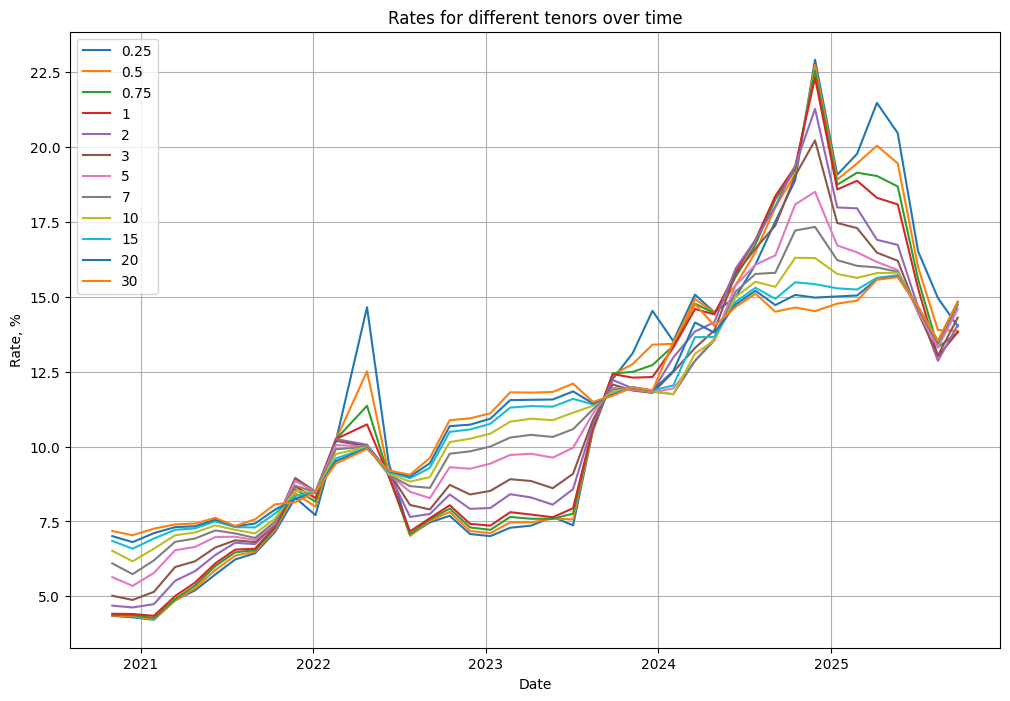

In [ ]:
PLOT_INTERVAL = 30


plt.figure(figsize=(12, 8))

for tenor in [0.25, 0.5, 0.75, 1, 2, 3, 5, 7, 10, 15, 20, 30]:
    plt.plot(df['date'][::PLOT_INTERVAL], df[str(tenor)][::PLOT_INTERVAL], label=tenor)

plt.title('Rates for different tenors over time')
plt.xlabel('Date')
plt.ylabel('Rate, %')
plt.legend()
plt.grid()

plt.show()

In [68]:
def nelson_siegel(tau, beta0, beta1, beta2, lam):
    term1 = (1 - np.exp(-tau / lam)) / (tau / lam)
    term2 = term1 - np.exp(-tau / lam)

    return beta0 + beta1 * term1 + beta2 * term2

In [69]:
def fit_nelson_siegel(tenors, yields):
    beta0_0 = yields[-1]
    beta1_0 = yields[0] - yields[-1]
    beta2_0 = 0.01
    lam_0 = 1.0

    def residuals(theta):
        return nelson_siegel(tenors, *theta) - yields

    init = [beta0_0, beta1_0, beta2_0, lam_0]
    bounds = ([-1, -5, -5, 0.01], [1, 5, 5, 10])
    res = least_squares(residuals, init, bounds=bounds)

    return res.x

In [71]:
df['1']

0        4.42
1        4.43
2        4.39
3        4.32
4        4.33
        ...  
1251    13.92
1252    13.71
1253    13.65
1254    13.55
1255    13.48
Name: 1, Length: 1256, dtype: float64

In [70]:
fit_nelson_siegel([1], df['1'])

KeyError: -1